In [239]:
import pandas as pd
import io
import requests
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

pd.options.display.max_columns = 50

In [208]:
url_text = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.html"
r = requests.get(url_text)
display(HTML(r.content.decode('utf-8')))

In [209]:
url_text = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/Cdiabetes.html"
r = requests.get(url_text)
display(HTML(r.content.decode('utf-8')))

Name,Labels,Units,Levels,Storage,NAs
id,Subject ID,,,double,0
chol,Total Cholesterol,,,double,1
stab.glu,Stabilized Glucose,,,double,0
hdl,High Density Lipoprotein,,,double,1
ratio,Cholesterol/HDL Ratio,,,double,1
glyhb,Glycosolated Hemoglobin,,,double,13
location,,,2,integer,0
age,,years,,double,0
gender,,,2,integer,0
height,,inches,,double,5


• Mellitus Type II (adult onset diabetes) is associated most strongly with obesity.

• The waist/hip ratio may be a predictor in diabetes and heart disease. 

• DM II is also agssociated with hypertension - they may both be part of "Syndrome X". 

• The 403 subjects were the ones who were actually screened for diabetes. 

• Glycosolated hemoglobin > 7.0 is usually taken as a positive diagnosis of diabetes. 

In [210]:
# for CSV
url_data = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.csv"
r = requests.get(url_data).content
df = pd.read_csv(io.StringIO(r.decode('utf-8')))
df.head(10)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
5,1008,248.0,94,69.0,3.6,4.81,Buckingham,34,male,71.0,190.0,large,132.0,86.0,NaN,NaN,36.0,42.0,195.0
6,1011,195.0,92,41.0,4.8,4.84,Buckingham,30,male,69.0,191.0,medium,161.0,112.0,161.0,112.0,46.0,49.0,720.0
7,1015,227.0,75,44.0,5.2,3.94,Buckingham,37,male,59.0,170.0,medium,NaN,NaN,NaN,NaN,34.0,39.0,1020.0
8,1016,177.0,87,49.0,3.6,4.84,Buckingham,45,male,69.0,166.0,large,160.0,80.0,128.0,86.0,34.0,40.0,300.0
9,1022,263.0,89,40.0,6.6,5.78,Buckingham,55,female,63.0,202.0,small,108.0,72.0,NaN,NaN,45.0,50.0,240.0


# "Automatic" EDA using ProfileReport

In [211]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("diabetes_dataset_profiling_report.html")

# "Manual" EDA

In [212]:
from pandas.plotting import scatter_matrix

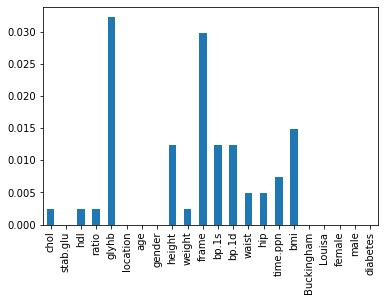

In [255]:
(df.isna().sum() / len(df)).plot.bar();

In [254]:
df = df.drop(['bp.2s','bp.2d'], 1)

In [213]:
df['bmi'] = 703 * df['weight'] / df['height']**2 # Formula: 703 x weight (lbs) / [height (in)]2

In [214]:
df = pd.concat([df, pd.get_dummies(data=df['location'])], 1)
df = pd.concat([df, pd.get_dummies(data=df['gender'])], 1)
df['diabetes'] = df['glyhb'] > 7.0
df = df.drop('id', 1)

In [257]:
feature_vars = df.dtypes[df.dtypes != np.object].index
continuous_vars = df.dtypes[df.dtypes == np.float64].index
df[continuous_vars].head()

,chol,hdl,ratio,glyhb,height,weight,bp.1s,bp.1d,waist,hip,time.ppn,bmi
0,203.0,56.0,3.6,4.31,62.0,121.0,118.0,59.0,29.0,38.0,720.0,22.128772
1,165.0,24.0,6.9,4.44,64.0,218.0,112.0,68.0,46.0,48.0,360.0,37.415527
2,228.0,37.0,6.2,4.64,61.0,256.0,190.0,92.0,49.0,57.0,180.0,48.365493
3,78.0,12.0,6.5,4.63,67.0,119.0,110.0,50.0,33.0,38.0,480.0,18.635999
4,249.0,28.0,8.9,7.72,68.0,183.0,138.0,80.0,44.0,41.0,300.0,27.822016


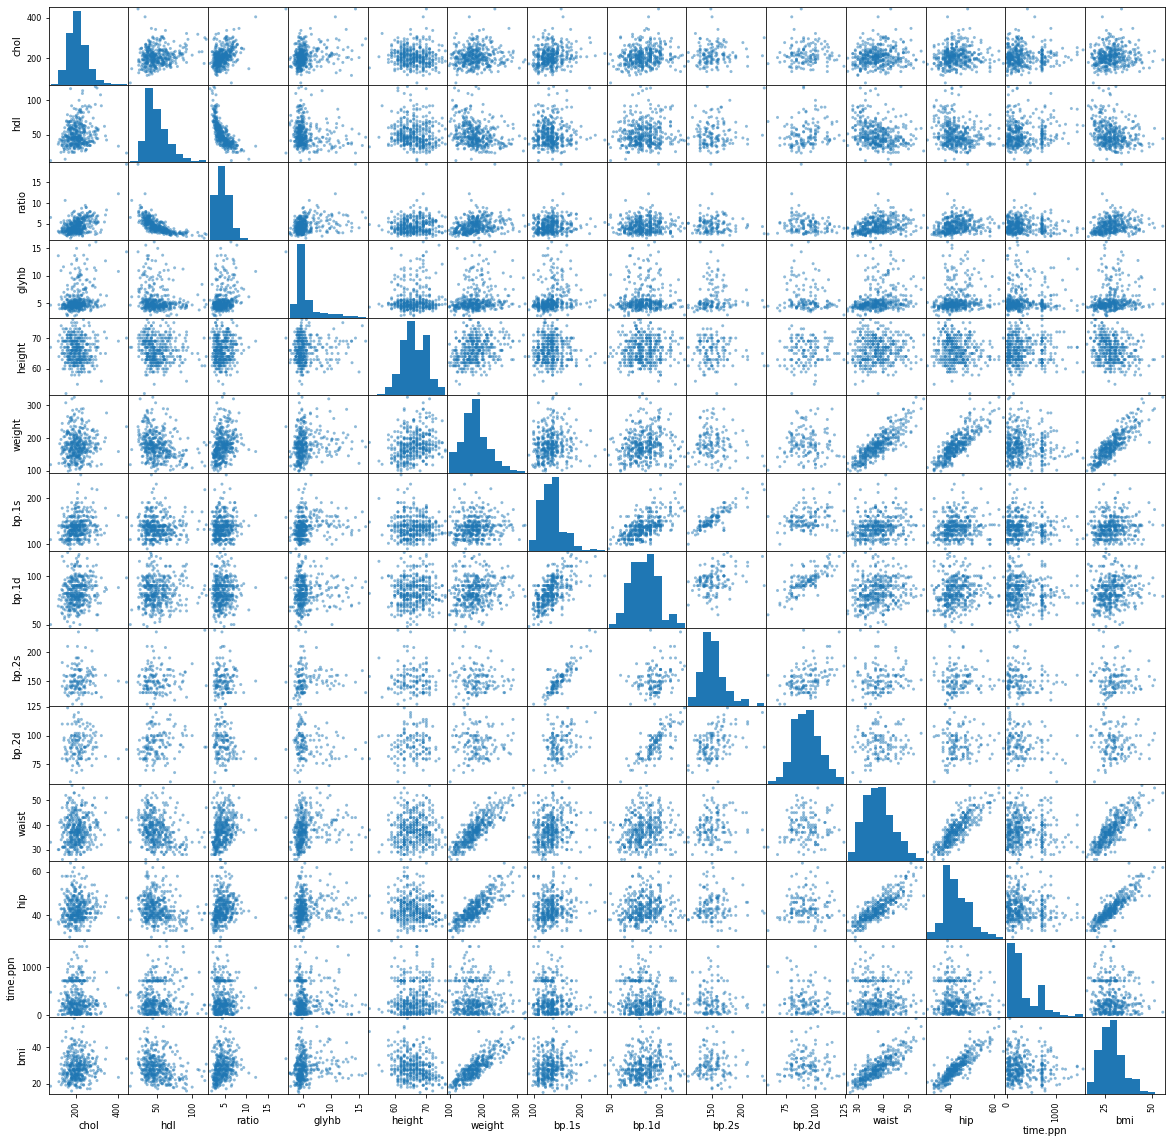

In [216]:
scatter_matrix(df[continuous_vars], figsize=(20,20));

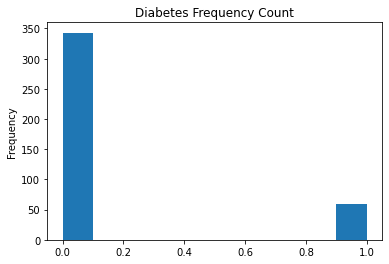

In [217]:
df['diabetes'].astype(int).plot.hist(title='Diabetes Frequency Count');

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chol,402.0,207.845771,44.445557,78.000000,179.000000,204.000000,230.000000,443.000000
stab.glu,403.0,106.672457,53.076655,48.000000,81.000000,89.000000,106.000000,385.000000
hdl,402.0,50.445274,17.262626,12.000000,38.000000,46.000000,59.000000,120.000000
ratio,402.0,4.521642,1.727886,1.500000,3.200000,4.200000,5.400000,19.299999
glyhb,390.0,5.589769,2.242595,2.680000,4.380000,4.840000,5.600000,16.110001
age,403.0,46.851117,16.312333,19.000000,34.000000,45.000000,60.000000,92.000000
height,398.0,66.020101,3.918515,52.000000,63.000000,66.000000,69.000000,76.000000
weight,402.0,177.592040,40.340666,99.000000,151.000000,172.500000,200.000000,325.000000
bp.1s,398.0,136.904523,22.741033,90.000000,121.250000,136.000000,146.750000,250.000000
bp.1d,398.0,83.321608,13.589227,48.000000,75.000000,82.000000,90.000000,124.000000


# Hypothesis testing

## Test if men and women have different BMI.

In [219]:
df_nna = df.dropna(subset=['height','weight','gender'])

bmi_male = df_nna.loc[df['gender']=='male', 'bmi'].values
bmi_female = df_nna.loc[df['gender']=='female', 'bmi'].values

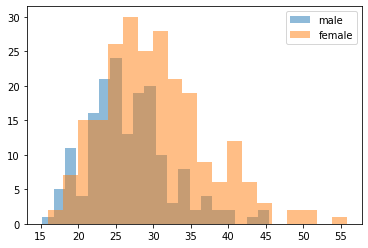

In [220]:
plt.hist(bmi_male, alpha=0.5, label='male', bins=20);
plt.hist(bmi_female, alpha=0.5, label='female', bins=20);
plt.legend();

In [221]:
print(bmi_male.std())
print(bmi_female.std())

5.504191148738877
6.939270185802427


So the variance are not equal, which means that we'll have to run our ttest with `equal_var = False`

### Compute confidence interval for the underlying mean differnece between two groups (assume equal variances)
Even though variances are unequal, I don't know what to do in that case, so until I find out I'm just going to compute 95% CI using the method that assumes the variances _are_ equal.

In [222]:
# compute difference in means
avg_diff = bmi_male.mean() - bmi_female.mean()
print("avg_diff=",avg_diff)

# compute variances
var1 = np.var(bmi_male)
var2 = np.var(bmi_female)

count1 = len(bmi_male)
count2 = len(bmi_female)

# compute SE(x1 - x2) for two independent continuous variables (un-paired)
se = np.sqrt((var1/count1) + (var2/count2))
print(f"se={se}")

avg_diff= -3.465273063448997
se=0.6249889707026016


Get the **Student's T Critical Value**

In [232]:
from scipy.stats import t

# define probability
alpha = 0.95
dof = count1 + count2

# retrieve value <= probability
value = t.ppf(alpha, dof)
print(f'Test statistic={value}')

# confirm with cdf
p = t.cdf(value, dof)
print(f"t.cdf({value}, dof={dof})={p}")

confidence_interval = (avg_diff - value*se, avg_diff +value*se)
print(f"confidence_interval={confidence_interval}")

Test statistic=1.6487008630445674
t.cdf(1.6487008630445674, dof=397)=0.949999999999998
confidence_interval=(-4.495692918839712, -2.434853208058282)


So our confidence interval does not include 0, meaning our result is significant at the 95% threshold, and the two means are different, with females and males having statistically different BMI measurements.

In [ ]:
# confidence_level = 0.95
# degrees_freedom = sample.size - 1
# sample_mean = np.mean(sample)
# sample_standard_error = scipy.stats.sem(sample)
# confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

In [233]:
# use scipy.stats.ttest_ind to compute test statistic and p-value for difference in means 
statistic, pvalue = scipy.stats.ttest_ind(a=bmi_male, 
                                          b=bmi_female, 
                                          equal_var=False) # if False, perform Welch’s t-test, which does not assume equal population variance

print(statistic, pvalue)

-5.530379631534946 5.843165974345609e-08


In [234]:
# non-parametric test
statistic, pvalue = scipy.stats.ranksums(bmi_male, bmi_female)
print(statistic, pvalue)

-5.135019960338229 2.821140808755784e-07


# Use logistic regression to model the outcome of diabetes

In [289]:
df.head(2)

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,bmi,Buckingham,Louisa,female,male,diabetes
0,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,22.128772,1,0,1,0,0
1,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,37.415527,1,0,1,0,0


In [292]:
target_var = 'diabetes'
# feature_vars = [f for f in feature_vars if f!=target_var]
continuous_vars = ['glyhb','hdl','ratio','stab.glu','bmi']
binary_vars = ['Buckingham','Louisa','female','male']
feature_vars = continuous_vars + binary_vars

In [291]:
df = df.dropna(subset=feature_vars)

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

lr = LogisticRegression()

# x_train = df[feature_vars].values
x_train = np.concatenate([preprocessing.scale(df[continuous_vars].values), 
                          df[binary_vars].values], 
                         axis=1)

y_train = df[target_var].values

In [309]:
x_train.shape

(375, 9)

In [310]:
y_train.shape

(375,)

In [311]:
lr.fit(X=x_train, y=y_train)

LogisticRegression()